In [1]:
import os
import torch
import torchvision
from zipfile import ZipFile

In [2]:
# Extract from archive
with ZipFile('./dataset.zip', 'r') as zip:
    zip.extractall(path='./data')

In [5]:
data_dir = './data/dataset'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/training_set")
print(classes)

['single_prediction', 'test_set', 'training_set']
['cats', 'dogs']


In [6]:
cats_images = os.listdir(data_dir + "/training_set/cats")
print(cats_images[:5])

['.DS_Store', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']


In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
dataset = ImageFolder(data_dir+'/training_set', transform=ToTensor())

RGB images have 3 channels.

In [9]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 280, 300]) 0


tensor([[[0.1529, 0.1529, 0.1569,  ..., 0.8118, 0.7922, 0.7882],
         [0.1569, 0.1569, 0.1569,  ..., 0.7961, 0.7804, 0.7725],
         [0.1569, 0.1569, 0.1569,  ..., 0.7804, 0.7765, 0.7765],
         ...,
         [0.1255, 0.1176, 0.1020,  ..., 0.1412, 0.1686, 0.2235],
         [0.1255, 0.1176, 0.1020,  ..., 0.1647, 0.1804, 0.2157],
         [0.1255, 0.1137, 0.0980,  ..., 0.2000, 0.1725, 0.1569]],

        [[0.1725, 0.1725, 0.1725,  ..., 0.8000, 0.7804, 0.7804],
         [0.1765, 0.1765, 0.1725,  ..., 0.7843, 0.7686, 0.7647],
         [0.1765, 0.1765, 0.1725,  ..., 0.7686, 0.7647, 0.7647],
         ...,
         [0.1176, 0.1098, 0.0941,  ..., 0.0902, 0.1176, 0.1804],
         [0.1176, 0.1098, 0.0941,  ..., 0.1137, 0.1294, 0.1765],
         [0.1176, 0.1059, 0.0902,  ..., 0.1490, 0.1216, 0.1176]],

        [[0.1569, 0.1569, 0.1686,  ..., 0.6706, 0.6431, 0.6314],
         [0.1608, 0.1608, 0.1686,  ..., 0.6627, 0.6314, 0.6157],
         [0.1608, 0.1608, 0.1686,  ..., 0.6471, 0.6353, 0.

In [10]:
print(dataset.classes)

['cats', 'dogs']


In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [12]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  cats (0)


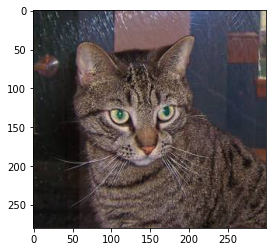

In [13]:
show_example(*dataset[0])

Label:  cats (0)


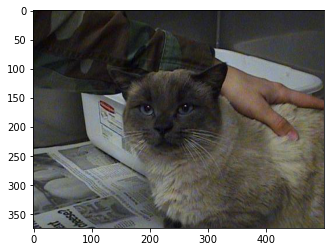

In [14]:
show_example(*dataset[1099])

## Defining the Model (Convolutional Neural Network)


<img src="https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" style="max-width:400px;">


In [15]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [16]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class CnnLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            
            
            nn.Flatten(), 
            nn.Linear(16, 2)
        )

In [20]:
model = CnnLayer()
model

CnnLayer(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=16, out_features=2, bias=True)
  )
)